In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [9]:
ill_df = pd.read_csv(_config.DATA_DIR + '/Badran_Illumina_SNPs_1pct_pivot.csv')

pb_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e_form_dataset/obs_reads_pivot.csv')

In [17]:
ill_mdf = ill_df.melt(
    id_vars = 'Nucleotide and position', 
    var_name = 'Time',
    value_name = 'Frequency'
)

pb_mdf = pb_df.melt(
    id_vars = 'Nucleotide and position', 
    var_name = 'Time',
    value_name = 'Frequency'
)

mdf = ill_mdf.merge(
    pb_mdf, 
    on = ['Nucleotide and position', 'Time'], 
    how = 'outer',
    suffixes = ['_ill', '_pb'],
)
mdf.head()

,Nucleotide and position,Time,Frequency_ill,Frequency_pb
0,V0,0,0.004510,0.5
1,.0,0,0.995490,0.5
2,I1,0,0.002600,0.0
3,.1,0,0.997400,1.0
4,W2,0,0.003266,0.0


## Exploratory comparison of ill and PB data reveals some disagreements

(0.967480985943181, 0.0)


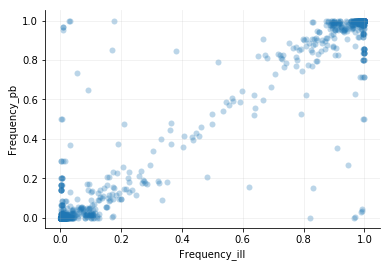

In [21]:
col1 = 'Frequency_ill'
col2 = 'Frequency_pb'
d1, d2 = mdf[col1], mdf[col2]

sns.scatterplot(
    x = col1,
    y = col2,
    data = mdf,
    alpha = 0.3,
    linewidth = 0,
)
plt.grid(alpha = 0.2)
sns.despine()

#
from scipy.stats import pearsonr
print(pearsonr(mdf[col1], mdf[col2]))

In [22]:
mdf['Diff'] = mdf[col1] - mdf[col2]
mdf.head()

,Nucleotide and position,Time,Frequency_ill,Frequency_pb,Diff
0,V0,0,0.004510,0.5,-0.495490
1,.0,0,0.995490,0.5,0.495490
2,I1,0,0.002600,0.0,0.002600
3,.1,0,0.997400,1.0,-0.002600
4,W2,0,0.003266,0.0,0.003266


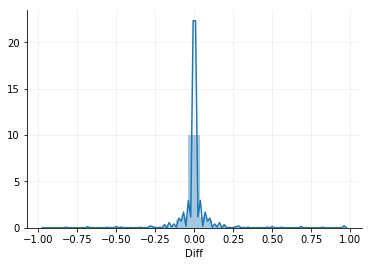

In [23]:
sns.distplot(mdf['Diff'])
sns.despine()
plt.grid(alpha = 0.2)

In [24]:
mdf['Diff'].describe()

count    1.292000e+03
mean     6.327981e-18
std      1.192043e-01
min     -9.672946e-01
25%     -6.869349e-03
50%     -1.730387e-16
75%      6.869349e-03
max      9.672946e-01
Name: Diff, dtype: float64

In [28]:
mdf.sort_values(by = 'Diff', ascending = True).iloc[:50]

,Nucleotide and position,Time,Frequency_ill,Frequency_pb,Diff
1106,W2,29,0.032705,1.000000,-0.967295
1068,W2,28,0.029244,0.996032,-0.966787
954,W2,25,0.007015,0.966887,-0.959872
1144,W2,30,0.010128,0.969027,-0.958899
916,W2,24,0.007125,0.954545,-0.947420
1182,W2,31,0.177482,1.000000,-0.822518
266,V0,7,0.169644,0.851064,-0.681420
190,V0,5,0.053283,0.733333,-0.680050
228,V0,6,0.090599,0.645833,-0.555235
10,D5,0,0.001626,0.500000,-0.498374


In [29]:
mdf['Abs diff'] = np.abs(mdf['Diff'])

In [30]:
abs_diffs = [s for s in mdf['Abs diff'] if s > -0.5 and s < 0.5]
print(len(abs_diffs), mdf.shape)

1274 (1292, 6)


In [32]:
np.std(abs_diffs)

0.057149716113659425

In [33]:
np.mean(abs_diffs)

0.02995102199790805

## Comparing Ill to PB trajectories reveals W2 as an outlier

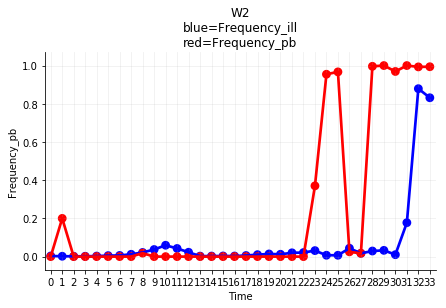

In [59]:
def plot_npos(npos = 'W2'):

    dfs = mdf[mdf['Nucleotide and position'] == npos]
    dfs = dfs.sort_values(by = 'Time')
    dfs['Time'] = dfs['Time'].astype(int)
    
    fig, ax = plt.subplots(figsize = (7, 4))

    sns.pointplot(
        x = 'Time',
        y = col1,
        data = dfs,
        color = 'blue',
        label = col1,
        ax = ax,
    )

    sns.pointplot(
        x = 'Time',
        y = col2,
        data = dfs,
        color = 'red',
        label = col2,
        ax = ax,
    )
    sns.despine()
    plt.grid(alpha = 0.2)
    plt.title(f'{npos}\nblue={col1}\nred={col2}')
    plt.show()
    plt.close()
    
    return

plot_npos()

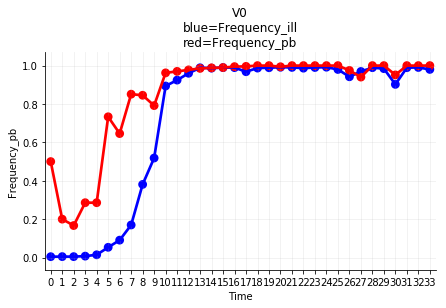

In [60]:
plot_npos(npos = 'V0')

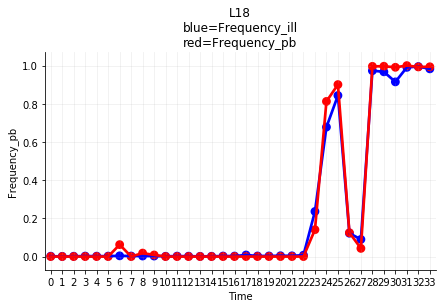

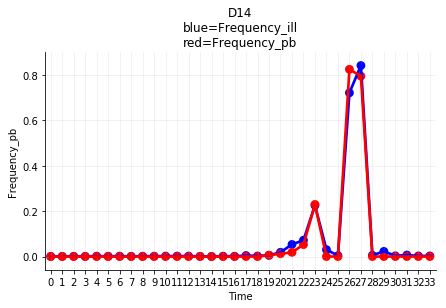

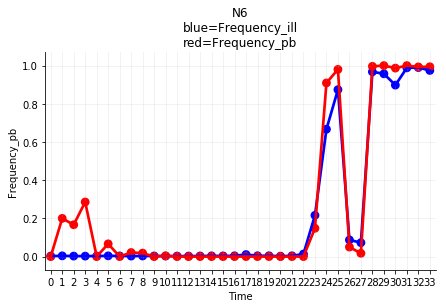

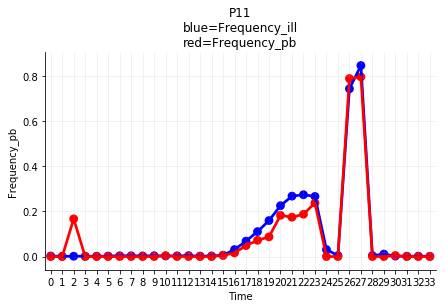

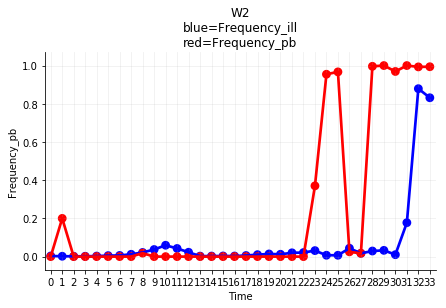

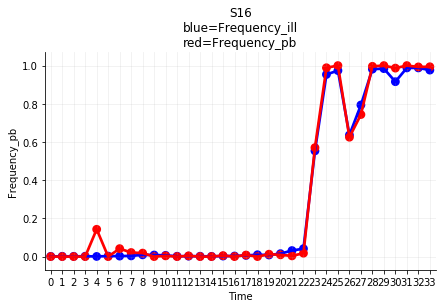

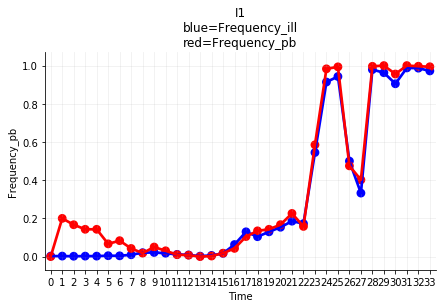

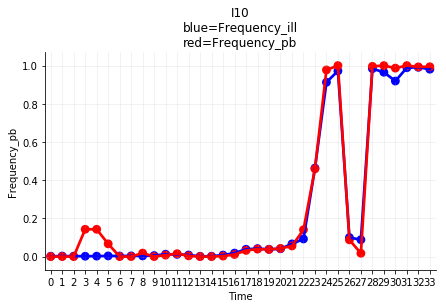

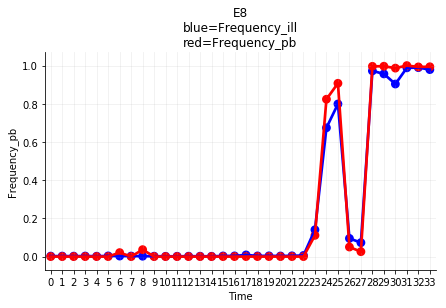

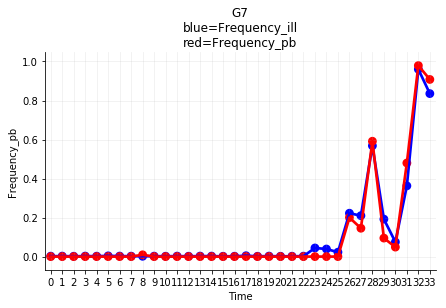

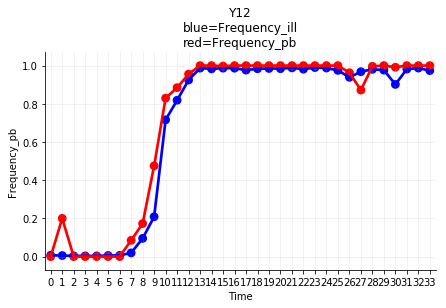

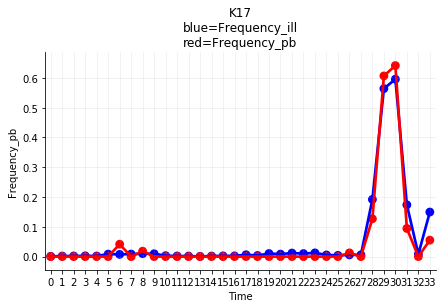

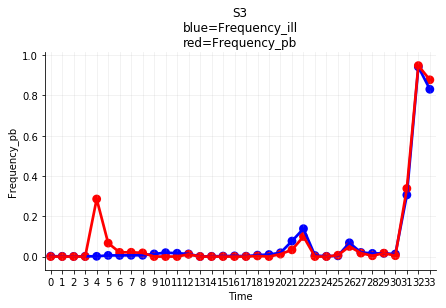

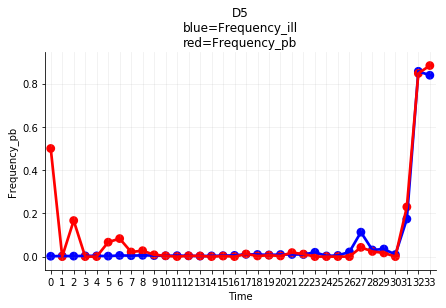

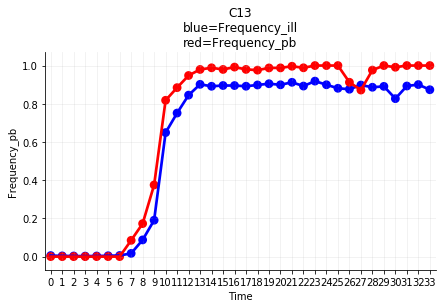

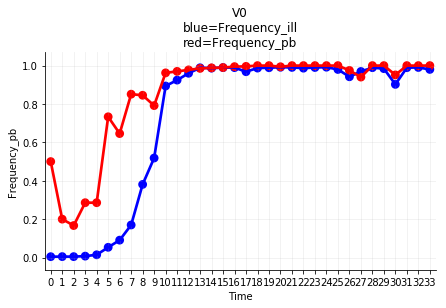

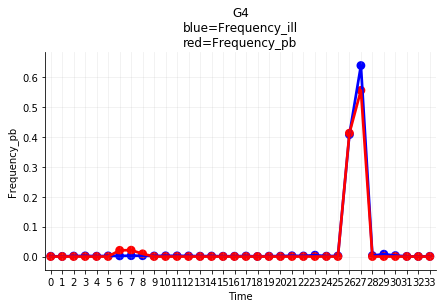

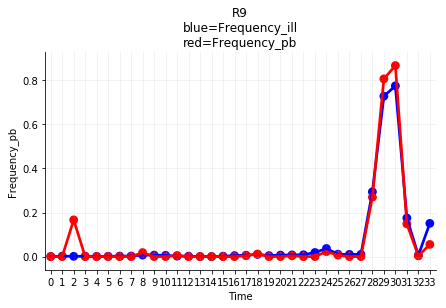

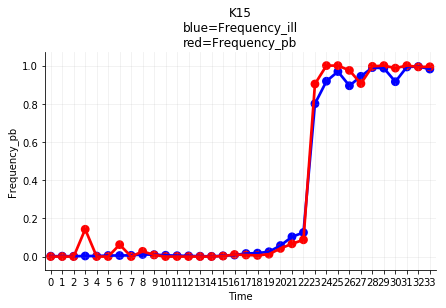

In [62]:
all_npos = set(mdf['Nucleotide and position'])

for npos in all_npos:
    if '.' in npos: continue
    plot_npos(npos = npos)

## W2 is an outlier

In [66]:
from collections import defaultdict
dd = defaultdict(list)

for npos in all_npos:
    if '.' in npos:
        continue
        
    dfs = mdf[mdf['Nucleotide and position'] == npos]
    
    from scipy.stats import pearsonr
    pr, pval = pearsonr(dfs[col1], dfs[col2])
    
    dd['Pearsonr'].append(pr)
    dd['Npos'].append(npos)

display(pd.DataFrame(dd))

,Pearsonr,Npos
0,0.996858,L18
1,0.994156,D14
2,0.981826,N6
3,0.978111,P11
4,0.494470,W2
5,0.997435,S16
6,0.990564,I1
7,0.995177,I10
8,0.997067,E8
9,0.992205,G7


Conclusion: W2 is a clear outlier, with pearsonr over time = 0.49 compared to >0.89 for all other mutations. 

Option 1: Use clear outlier disagreement as rationale to simply replace Ill trajectory of W2 with PacBio's. 

Or, option 2: Process Ill data and see if W2 trajectory is really that way. If it's not, then issue resolved. Additional benefit: Get hands on experience with processing shotgun sequencing data for DE.